[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/lorenzo-arcioni/BLAST-OUT-postprocessing/blob/main/AnnoRate.ipynb)

## Annotation Rate: Hit Rate Comparison

The table that reports the hit rates of protein sequences on various protein databases is important because it provides an indication of the coverage of protein sequences in different protein databases. This allows evaluating the effectiveness and exhaustion of protein databases and choosing the most appropriate one for a specific analysis. Additionally, this table can also provide an indication of the specificity of protein sequences based on their ability to match specific protein databases.

This notebook is capable of generating a table with hit percentages of every sequence from two input fasta files on the three major protein databases. It uses the annotation outputs obtained from both blastp and blastx searches to provide a comprehensive analysis of the hits for each database. This allows the user to evaluate the effectiveness and exhaustiveness of each protein database and determine the most appropriate one for a specific analysis.

Run this cell to load the required libraries.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Useful function for displaying more data
def display_all(df):
    with pd.option_context("display.max_columns", 1000):
        display(df)

def get_id_from_fasta(name):
    id_set = set()

    with open(name, 'r') as f:
        for line in f.readlines():
            if line.startswith('>'):
                id_set.add(line.split(' ')[0][1:])
    return list(id_set)

Now follows the instructions in the comments and fill properly the required fields.

In [2]:
# Insert the outformat of the output file
outformat = "qseqid qlen sseqid sallseqid slen qstart qend sstart send qseq full_qseq sseq full_sseq evalue bitscore score length pident nident mismatch positive gapopen gaps ppos qframe btop cigar staxids sscinames sskingdoms skingdoms sphylums stitle salltitles qcovhsp scovhsp qtitle qqual full_qqual qstrand"

# Insert the title of the table
title = "Culex pipiens - Hits Table"

# Insert the path to the output file
path = "/home/lorenzo/Documenti/culex_pipiens/graphs/" + title.lower().replace(" ", "_").replace("-", "")

# Insert the databases names 
db_names = [
    'NR',
    'TrEMBL',
    'Swiss-prot',
]

# Insert the columns names
column_names = [
    'Number of BLASTX results',
    'Number of BLASTP results',
]

# Insert the names (or path) of the fasta files
# follow the order of the column names.
infile = [
    '/home/lorenzo/Documenti/culex_pipiens/longest_orfs.cds',
    '/home/lorenzo/Documenti/culex_pipiens/longest_orfs.pep',
]

# Insert the names (or path) of the tsv files (must be ordered by table's columns)
# Also here follow the order of the column names. 
# (first column refers to the first column name (infile), the second column refers to the second column name (infile))
outfiles = [
    ['/home/lorenzo/Documenti/culex_pipiens/culex_pipiens_cds_nr.tsv','/home/lorenzo/Documenti/culex_pipiens/culex_pipiens_pep_nr.tsv'],
    ['/home/lorenzo/Documenti/culex_pipiens/culex_pipiens_cds_tr.tsv','/home/lorenzo/Documenti/culex_pipiens/culex_pipiens_pep_tr.tsv'],
    ['/home/lorenzo/Documenti/culex_pipiens/culex_pipiens_cds_sp.tsv','/home/lorenzo/Documenti/culex_pipiens/culex_pipiens_pep_sp.tsv'],
]

table_data = [['Database'] + [x for x in column_names]]

# Calculate the percentage of the sequences hits and store it in the table
for out in range(len(outfiles)):
    tmp = [db_names[out]]
    for file in range(len(outfiles[out])):
        df = pd.read_csv(outfiles[out][file], sep="\t", names=outformat.split())
        infile_id_count = get_id_from_fasta(infile[file])

        hits  = len(df['qseqid'].unique())
        total = len(infile_id_count)

        perc = hits / total * 100

        tmp.append(str(hits) + ' (' + str(round(perc, 1)) + ' %)')
        
        del df

    table_data.append(tmp)

And finally plot the table!

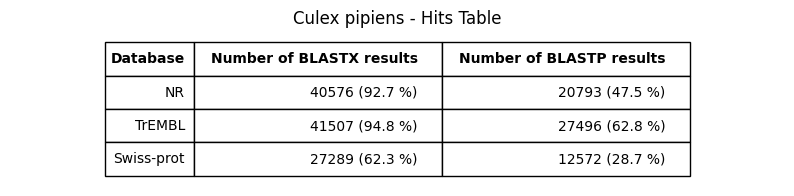

In [3]:
plt.rcParams["figure.figsize"] = (10,2)
fig, ax = plt.subplots()

table = ax.table(cellText=table_data, loc='center')

table.set_fontsize(34)
table.scale(1, 2)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
ax.set_title(title)

from matplotlib.font_manager import FontProperties

for (row, col), cell in table.get_celld().items():
  if (row == 0) or (col == -1):
    cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
ax.axis('off')
pd.DataFrame(table_data[1:], columns=table_data[0]).to_csv(path + '.tsv', index=False, sep='\t')
plt.savefig(path + '.png', bbox_inches = 'tight', dpi=300)
plt.show()